In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

table_path = "../data/data_num_325_45.csv"
# PCA_table_path = "../data/data_num_325_fea_30_PCA.csv"

temp1_table_path = "../data/data_num_325_fea_reduce.csv"
# temp2_table_path = "../data/data_num_325_fea_163.csv"
#Data loading
data = pd.read_csv(table_path)
y = data["Product_RON_loss"]
X = data.drop("Product_RON_loss",1)
X = X.drop("Product_RON",1)
X.head()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,2.32,7.30,...,2.045436,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,2.37,7.34,...,2.025974,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,2.43,7.27,...,1.964696,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,3.08,7.35,...,2.039041,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,2.45,6.58,...,1.986900,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [2]:
# Count the number of rows in total
print(X.shape)

(325, 366)


In [3]:
# Count the column types
X.dtypes.value_counts()

float64    366
dtype: int64

In [4]:
nans = pd.isnull(X).sum()
nans[nans>0]

Series([], dtype: int64)

In [5]:
X.describe()

,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL_1.CANGLIANG.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,325.000000,3.250000e+02,325.000000,3.250000e+02,325.000000
mean,229.548904,89.733538,52.676228,25.389298,21.949782,54.526661,726.755265,3.910154,3.030794,8.063265,...,2.221319,4843.993930,143.854913,6.719406e+07,1.113469e+06,2190.862732,1.521126e+07,2409.550662,1.760142e+07,-33.277532
std,65.752227,0.889764,4.584314,4.954857,1.823616,6.818416,4.262181,1.265322,1.722995,2.132002,...,0.166846,2359.134691,137.450504,3.861360e+07,1.169934e+06,418.047777,1.060279e+07,452.316109,1.172462e+07,42.008897
min,57.000000,87.200000,43.240000,14.600000,16.822222,36.520000,715.100000,3.200000,1.010000,2.940000,...,1.879160,0.000000,0.000000,0.000000e+00,3.050138e+04,979.564940,0.000000e+00,1222.663100,0.000000e+00,-120.560472
25%,185.000000,89.200000,49.610000,21.800000,20.690000,48.750000,724.200000,3.200000,1.850000,6.990000,...,2.087072,4215.424100,0.000000,3.272797e+07,3.518756e+04,1887.742875,6.520788e+06,2329.794550,7.974892e+06,-72.834572
50%,240.285714,89.800000,53.250000,24.800000,21.890000,53.980000,726.300000,3.200000,2.390000,8.400000,...,2.247015,5094.966775,142.936557,7.252226e+07,3.631831e+05,2177.557700,1.381849e+07,2538.538450,1.643785e+07,0.293821
75%,271.428571,90.300000,56.100000,29.000000,23.300000,60.190000,729.500000,4.200000,3.610000,9.370000,...,2.316061,6129.741900,203.804645,1.017919e+08,2.545050e+06,2496.749950,2.254427e+07,2702.628700,2.678945e+07,0.350086
max,392.000000,91.700000,63.400000,34.670000,26.200000,70.500000,738.700000,8.600000,9.090000,14.310000,...,2.856459,11320.456750,589.154615,1.236097e+08,2.562289e+06,3334.904725,3.906312e+07,3104.564825,3.960876e+07,0.358053


In [6]:
X_temp0 = X.copy()
X_temp0['Product_RON_loss'] = y
corrmat0 = X_temp0.corr()
corr_df = corrmat0['Product_RON_loss'].sort_values(ascending=False)
corr_df

Product_RON_loss          1.000000
S-ZORB.FT_9302.PV         0.361847
S-ZORB.PC_2401.PIDA.OP    0.325739
S-ZORB.FT_1002.PV         0.325705
S-ZORB.TE_2001.DACA       0.325394
                            ...   
S-ZORB.TE_1104.DACA.PV   -0.350235
S-ZORB.TE_1103.DACA.PV   -0.350896
S-ZORB.TE_1106.DACA.PV   -0.351222
S-ZORB.TE_6001.DACA.PV   -0.356464
S-ZORB.TE_6008.DACA.PV   -0.359053
Name: Product_RON_loss, Length: 367, dtype: float64

Text(0.5, 1.0, 'Correlation coefficient of the variables')

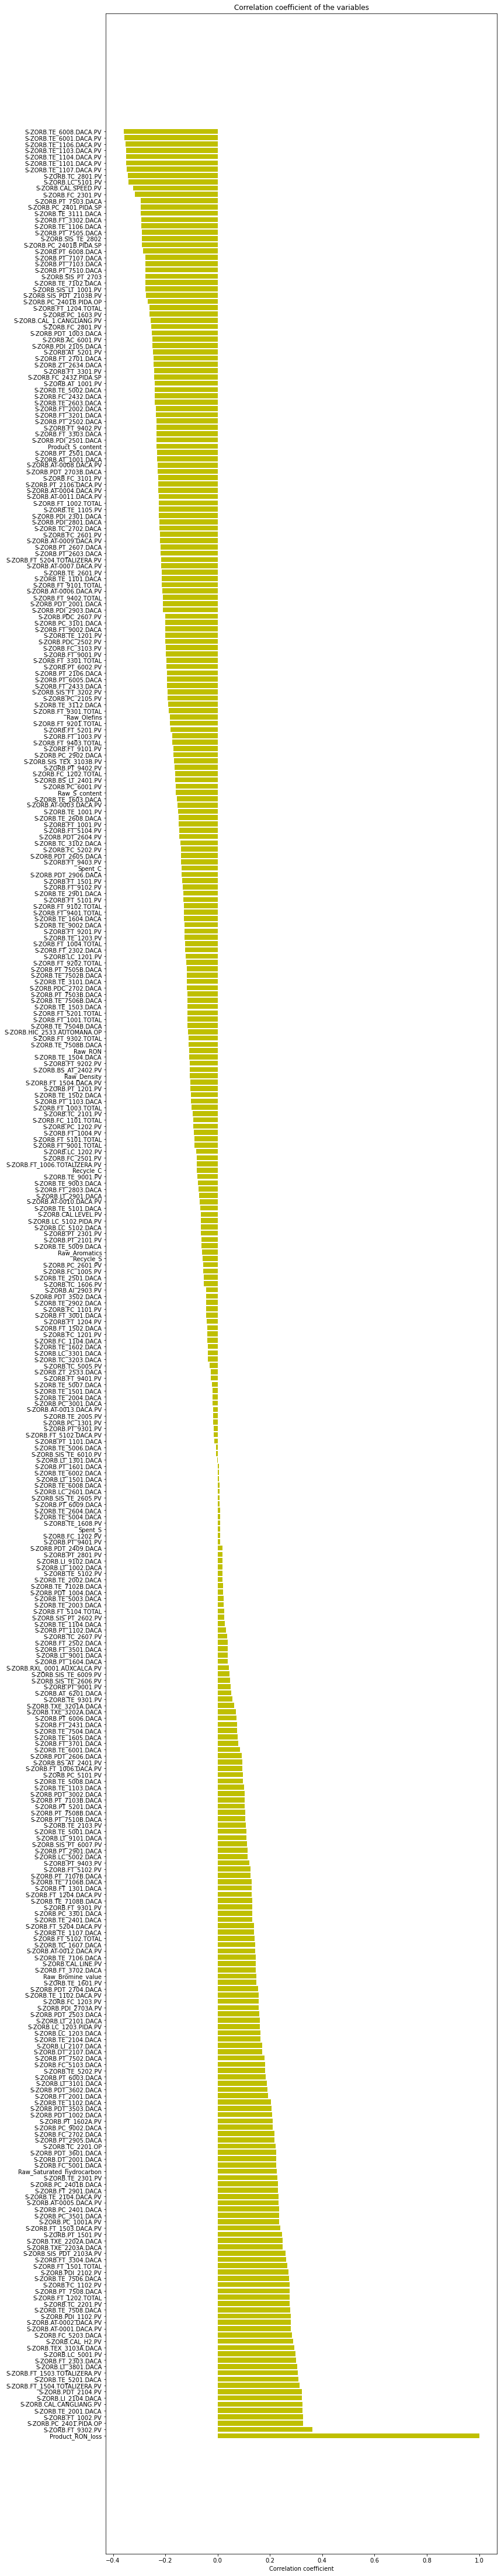

In [7]:
#How features are correlated with Product_RON_loss

ind = np.arange(len(corrmat0))
width = 1
fig,ax = plt.subplots(figsize=(12,80))
rects = ax.barh(ind,np.array(corr_df.values),color='y')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.index, rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')

In [8]:
#Feature select - Way 1: Variance Threshold

#Remove features with low variance
from sklearn.feature_selection import VarianceThreshold
all_name = X.columns.values.tolist()
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值,删除低于方差的特征
selector = VarianceThreshold(threshold = 0.05)
X_array = selector.fit_transform(X)
print(X_array.shape)
select_name_index0 = selector.get_support(indices=True)
select_name0 = []
for i in select_name_index0:
    select_name0.append(all_name[i])
X = pd.DataFrame(X_array, columns = select_name0)
X.head()

(325, 292)


,Raw_S_content,Raw_RON,Raw_Saturated_hydrocarbon,Raw_Olefins,Raw_Aromatics,Raw_Bromine_value,Raw_Density,Product_S_content,Spent_C,Spent_S,...,S-ZORB.CAL.LEVEL.PV,S-ZORB.FT_1006.DACA.PV,S-ZORB.FT_5204.DACA.PV,S-ZORB.FT_1006.TOTALIZERA.PV,S-ZORB.FT_5204.TOTALIZERA.PV,S-ZORB.FT_1503.DACA.PV,S-ZORB.FT_1503.TOTALIZERA.PV,S-ZORB.FT_1504.DACA.PV,S-ZORB.FT_1504.TOTALIZERA.PV,S-ZORB.PC_1001A.PV
0,188.0,90.6,53.230000,24.400000,22.370000,61.487143,726.085714,3.2,2.32,7.30,...,76.849853,6368.74700,233.310805,83086802.0,832503.795,2216.40935,39063124.5,1840.14470,39608757.0,0.353271
1,169.0,90.5,52.300000,26.400000,21.300000,61.880000,731.300000,3.2,2.37,7.34,...,76.184425,6360.64530,242.369205,82318954.0,803462.665,2370.58740,38810581.5,1641.73260,39389299.0,0.354504
2,177.0,90.7,52.300000,26.314286,21.385714,61.722857,729.614286,3.2,2.43,7.27,...,75.966841,6504.96490,233.076925,82012004.0,791925.055,2326.46535,38693812.0,1600.67575,39312616.5,0.350181
3,159.0,90.4,52.300000,26.100000,21.600000,61.330000,725.400000,3.2,3.08,7.35,...,76.790042,6506.82495,238.349935,81231373.5,762863.810,2495.22360,38410862.5,1563.71215,39120204.5,0.353930
4,173.0,89.6,52.242857,26.671429,21.085714,61.332857,725.428571,3.2,2.45,6.58,...,76.539556,6560.24225,236.576220,80915707.5,751362.300,2807.78910,38283000.0,1554.35740,39045953.5,0.358053


In [9]:
X_temp1 = X.copy()
X_temp1["Product_RON_loss"] = y
# X_temp1.to_csv(temp1_table_path)
# print("save reduced features to", temp1_table_path)

<AxesSubplot:>

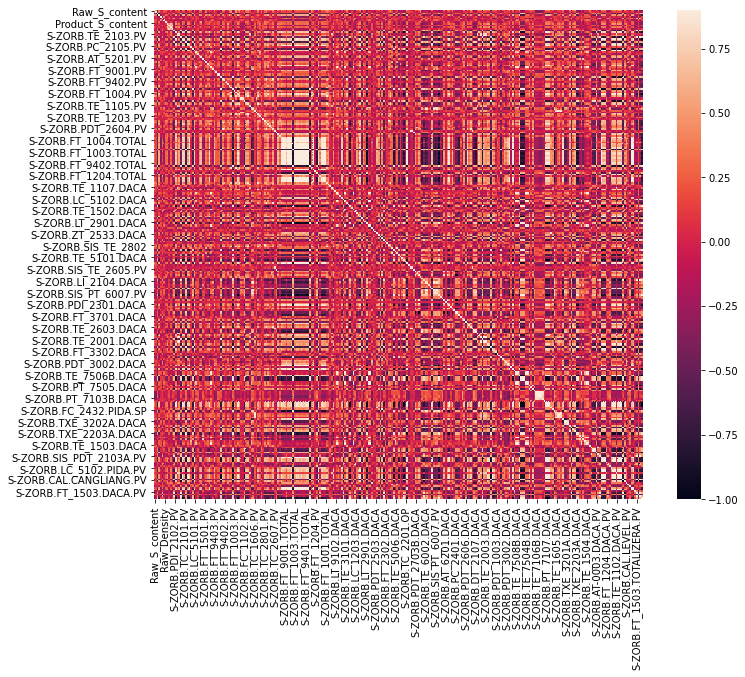

In [10]:
#Correlation map to see how features are correlated with each other
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [11]:
#Feature select - Way 2: corr
# Delete high corr features

# Threshold for removing correlated variables
threshold = 0.9

# Absolute value correlation matrix
corr_matrix = X.corr().abs()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
#print('There are %d columns to remove.' % (len(to_drop)))
X = X.drop(columns = to_drop)
X.shape

(325, 165)

<AxesSubplot:>

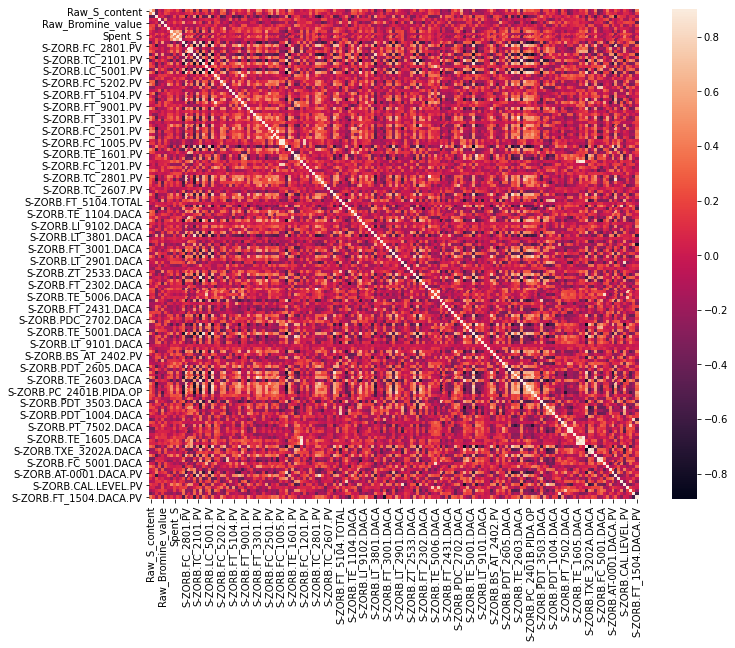

In [12]:
#Correlation map to see how features are correlated with each other
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Text(0.5, 1.0, 'Correlation coefficient of the variables')

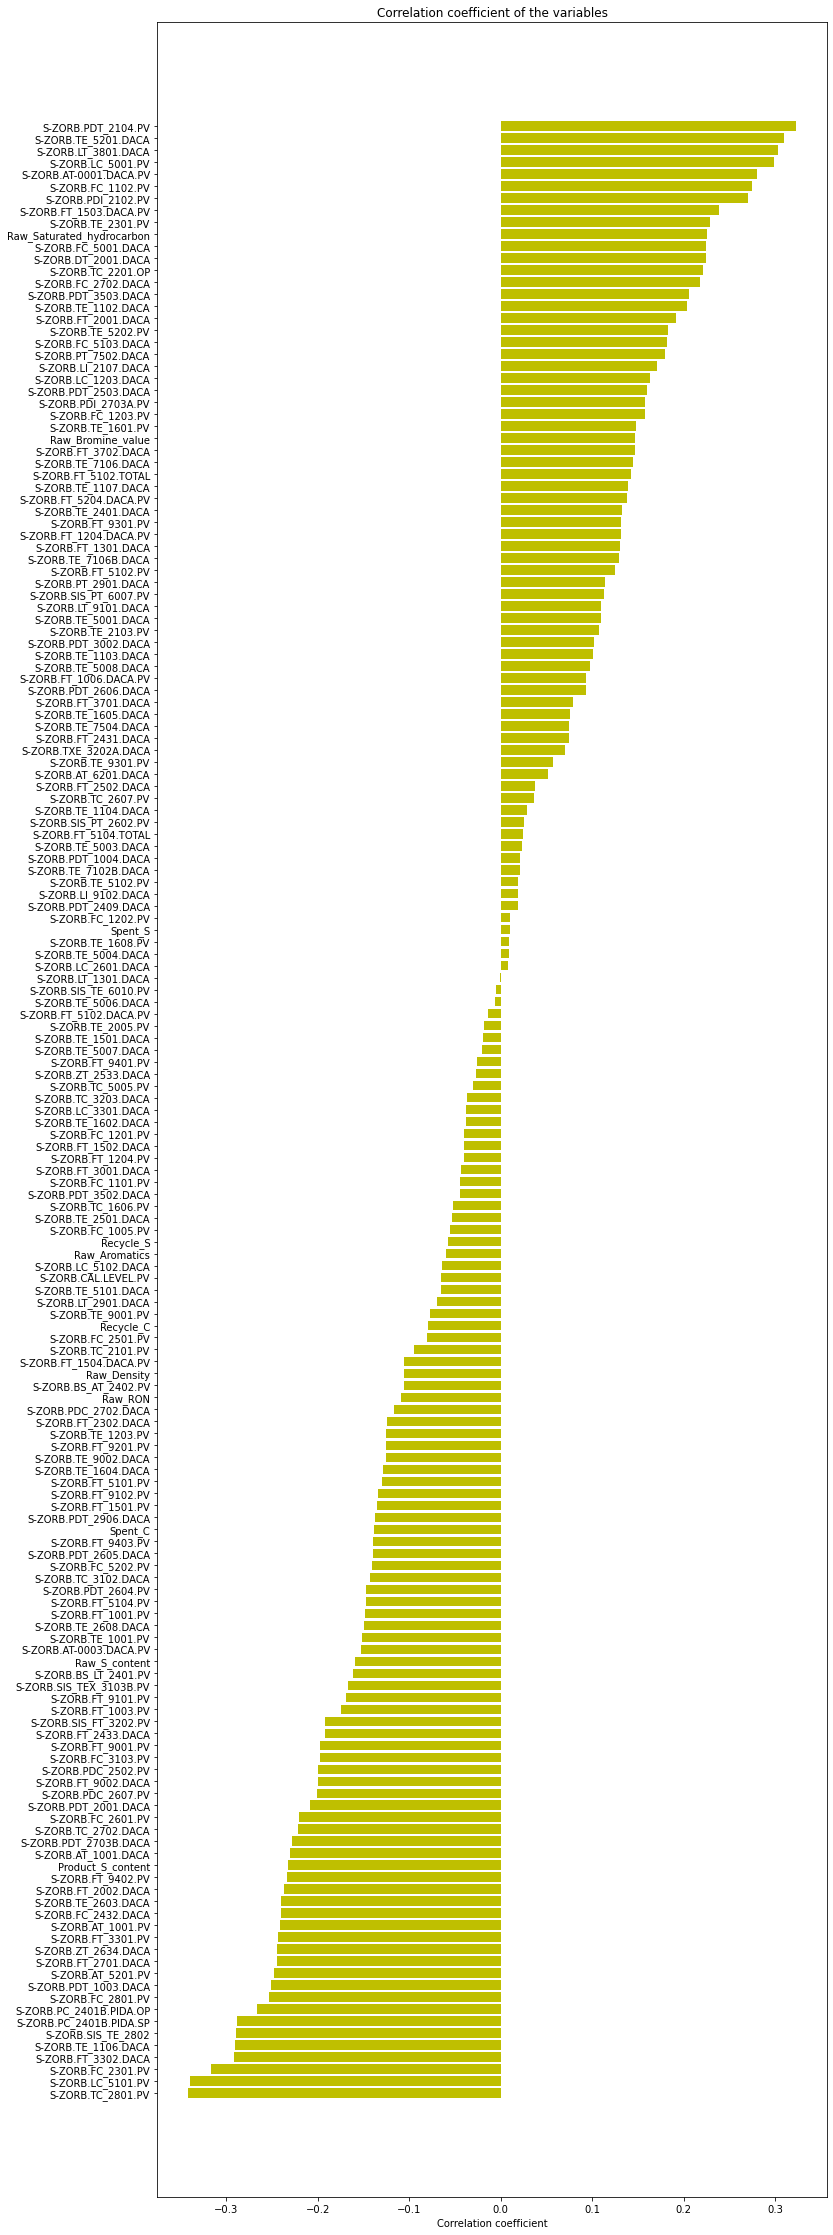

In [13]:
#How features are correlated with Product_RON_loss
labels = []
values = []

for col in X.columns:
    labels.append(col)
    values.append(np.corrcoef(X[col].values,y.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels,'corr_values':values})
corr_df = corr_df.sort_values(by = 'corr_values')

ind = np.arange(len(labels))
width = 1
fig,ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind,np.array(corr_df.corr_values.values),color='y')

ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')

In [14]:
X_temp2 = X.copy()
X_temp2["Product_RON_loss"] = y
X_temp2.to_csv(temp1_table_path)
print("save reduced features to", temp1_table_path)

save reduced features to ../data/data_num_325_fea_reduce.csv


In [15]:
#Feature reduce - Option 1: corr with Product_RON_loss